### Import Library

In [151]:
import keras,os
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

import numpy as np

### Determination Of Train And Test

In [152]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="./images/Training",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="./images/Test", target_size=(224,224))

Found 2246 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


### Delete Last Layer of VGG16 and Add Layer

In [153]:
vgg16_model=VGG16()
model = Sequential(vgg16_model.layers[:-1])
model.add(Dense(2, activation="softmax"))

### Model Compile

In [154]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=categorical_crossentropy, metrics=['accuracy'])

### Checkpoint & Early Stopping

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg-mask.h5", 
                             monitor='accuracy', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False, 
                             mode='auto', period=1)

early = EarlyStopping(monitor='accuracy', 
                      min_delta=0, 
                      patience=20, 
                      verbose=1, mode='auto')


### Model Fit

In [156]:
epochs=10
train_examples=2246
hist = model.fit_generator(steps_per_epoch=50,
                           generator=traindata, 
                           validation_data= testdata, 
                           validation_steps=10,
                           epochs=epochs,
                           callbacks=[checkpoint,early])

Epoch 1/10
50/50 [==============================] - ETA: 0s - loss: 169.3100 - accuracy: 0.6144WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.

Epoch 00001: accuracy improved from -inf to 0.61436, saving model to vgg-mask.h5
50/50 [==============================] - 25s 502ms/step - loss: 169.3100 - accuracy: 0.6144 - val_loss: 0.6265 - val_accuracy: 0.6000
Epoch 2/10
50/50 [==============================] - ETA: 0s - loss: 0.6645 - accuracy: 0.6375
Epoch 00002: accuracy improved from 0.61436 to 0.63750, saving model to vgg-mask.h5
50/50 [==============================] - 35s 695ms/step - loss: 0.6645 - accuracy: 0.6375
Epoch 3/10
50/50 [==============================] - ETA: 0s - loss: 0.6139 - accuracy: 0.6819
Epoch 00003: accuracy improved from 0.63750 to 0.68187, savin

### Model Visualization

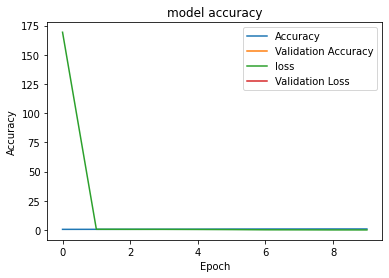

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

### Load Model

In [159]:
from keras.models import load_model
saved_model = load_model("vgg-mask.h5")

### Predict Visualization

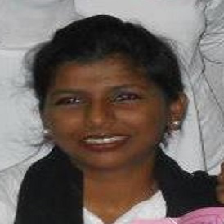

WITHOUT MASK
-----------------------------


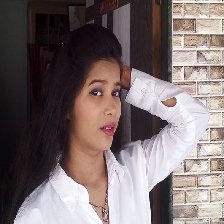

MASK
-----------------------------


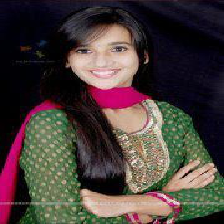

WITHOUT MASK
-----------------------------


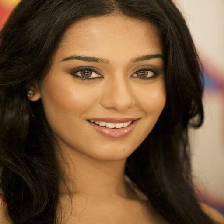

WITHOUT MASK
-----------------------------


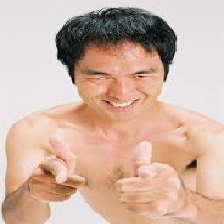

WITHOUT MASK
-----------------------------


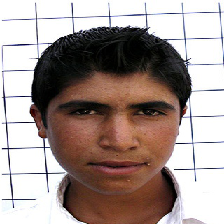

WITHOUT MASK
-----------------------------


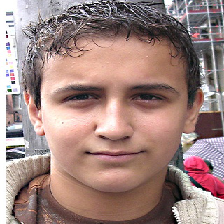

WITHOUT MASK
-----------------------------


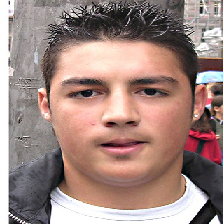

WITHOUT MASK
-----------------------------


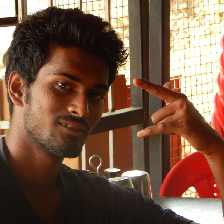

WITHOUT MASK
-----------------------------


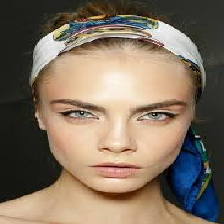

WITHOUT MASK
-----------------------------


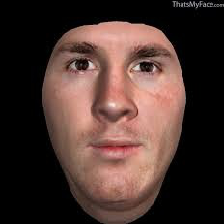

WITHOUT MASK
-----------------------------


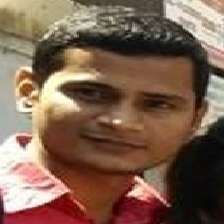

WITHOUT MASK
-----------------------------


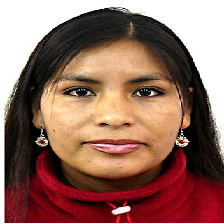

WITHOUT MASK
-----------------------------


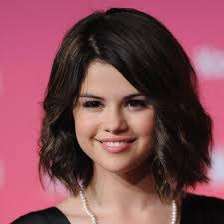

WITHOUT MASK
-----------------------------


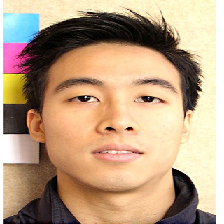

WITHOUT MASK
-----------------------------


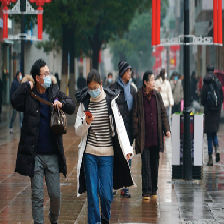

MASK
-----------------------------


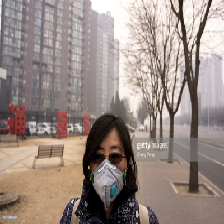

WITHOUT MASK
-----------------------------


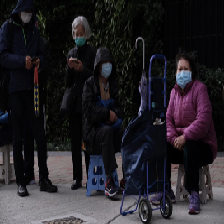

MASK
-----------------------------


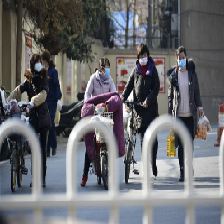

MASK
-----------------------------


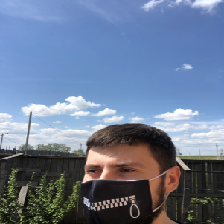

MASK
-----------------------------


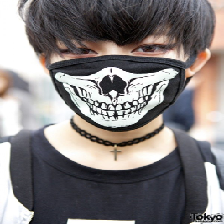

MASK
-----------------------------


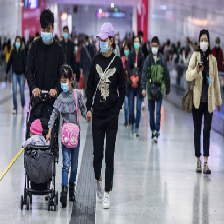

MASK
-----------------------------


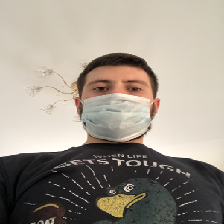

MASK
-----------------------------


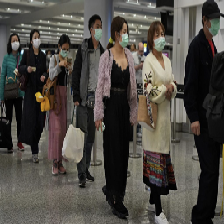

MASK
-----------------------------


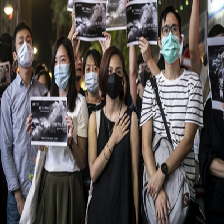

MASK
-----------------------------


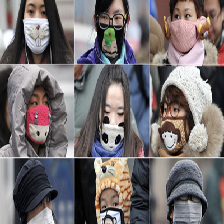

MASK
-----------------------------


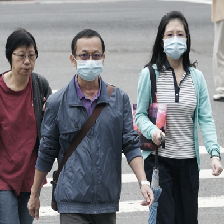

MASK
-----------------------------


In [160]:
from PIL import Image               
from IPython.display import display 
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os

directory = r'./images/Validation'

for filename in os.listdir(directory):
  img = image.load_img("./images/Validation/"+filename, target_size=(224,224))
  display(img)
  img = np.asarray(img)
  img = np.expand_dims(img, axis=0)
  output = saved_model.predict(img)

  if output[0][0] > output[0][1]:
    print("MASK")
  else:
    print('WITHOUT MASK')
  print("-----------------------------")
  